In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expected = pd.read_csv("../results/expected.csv", sep=";")
expected.head()

,QueryNumber,DocNumber,DocVotes
0,1,139,4
1,1,151,4
2,1,166,1
3,1,311,1
4,1,370,2


In [3]:
expected.loc[expected["QueryNumber"] == 1]

,QueryNumber,DocNumber,DocVotes
0,1,139,4
1,1,151,4
2,1,166,1
3,1,311,1
4,1,370,2
5,1,392,1
6,1,439,1
7,1,440,2
8,1,441,4
9,1,454,1


In [32]:
# Criar dicionário com QueryNumber como chave e lista de docs como valor
def get_expected_docs(expected_file_df):
    query_docs = {}
    query_numbers = list(expected_file_df["QueryNumber"].unique())

    for query_number in query_numbers:
        docs = list(expected_file_df.loc[expected_file_df["QueryNumber"] == query_number]["DocNumber"])
        query_docs[query_number] = docs

    return query_docs

In [19]:
results = pd.read_csv("../results/results-stemmer.csv", sep=";", converters={"DocInfos": pd.eval})
results.head()

,QueryNumber,DocInfos
0,1,"[1, 437, 0.27588934462955456]"
1,1,"[2, 498, 0.20844373959940954]"
2,1,"[3, 484, 0.18440699663023122]"
3,1,"[4, 754, 0.17310807431022798]"
4,1,"[5, 957, 0.16879740146000236]"


In [29]:
def get_results_docs(results_file_df):
    results_docs = {}
    query_numbers = list(results_file_df["QueryNumber"].unique())

    for query_number in query_numbers:
        docs = []
        query_results = list(results_file_df.loc[results_file_df["QueryNumber"] == query_number]["DocInfos"])
        for single_result in query_results:
            doc_number = int(single_result[1])
            docs.append(doc_number)
        results_docs[query_number] = docs
    
    return results_docs

Dois dicionários -> Com Esperados e Resultados

In [33]:
ex_docs = get_expected_docs(expected)
res_docs = get_results_docs(results)

In [100]:
def precision(list_correct, list_return):
    total_correct = 0
    for doc_number in list_return:
        if doc_number in list_correct:
            total_correct += 1
            
    total_return = len(list_return)
    return total_correct / total_return * 100

In [101]:
def recall(doc_number, list_docs):
    total_docs = len(list_docs)
    if doc_number in list_docs:
        return 1 / total_docs * 100
    return 0.0

In [102]:
# fazer a tabelinha de precision e recall
def pr_curve(expected_docs, results_docs, query_number):
    correct_docs = expected_docs[query_number]  # lista com a resposta esperada não-ordenada
    returned_docs = results_docs[query_number]  # lista com o retorno do mecanismo, ordenado
    
    plot_table = pd.DataFrame([], columns=["DocNumber", "Recall", "Precision"])
    r = 0.0
    for index, doc_number in enumerate(returned_docs):
        # Para não termos o gráfico de serra, quando o recall não muda, não adicionamos o ponto no gráfico
        if recall(doc_number, correct_docs) == 0.0:
            continue
        r += recall(doc_number, correct_docs)
        p = precision(correct_docs, returned_docs[:index+1]) # calcular a precision até o doc atual
        plot_table.loc[index] = [int(doc_number), r, p]
    return plot_table

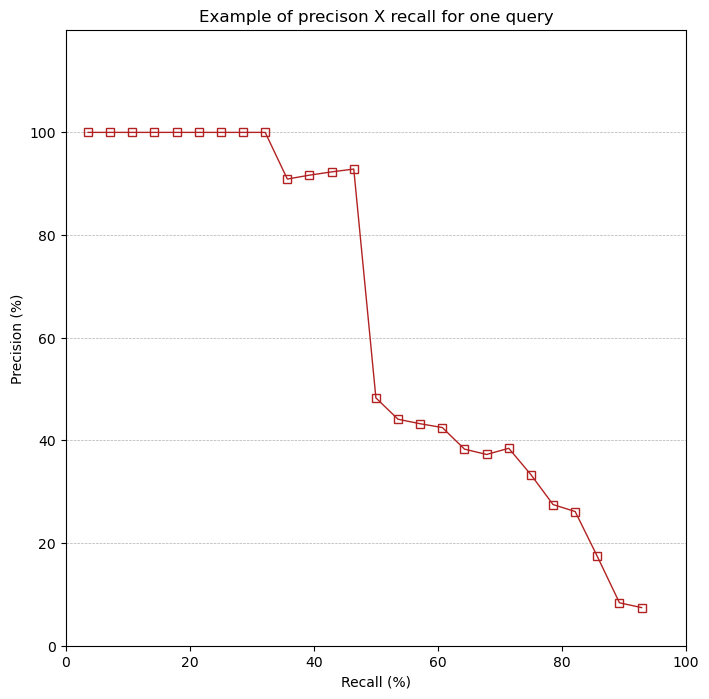

In [139]:
plt.figure(figsize=(8, 8))

plt.plot(pr_curve(ex_docs, res_docs, 90)["Recall"], pr_curve(ex_docs, res_docs, 90)["Precision"], 
         marker="s", markerfacecolor="none", ms=6, color="firebrick", linewidth=1)

plt.axis([0, 100, 0, 120])
plt.grid(axis="y", linestyle = '--', linewidth=0.5)

plt.title("Example of precison X recall for one query")
plt.xlabel("Recall (%)")
plt.ylabel("Precision (%)")
plt.yticks([0, 20, 40, 60, 80, 100])

plt.show()